#### Thanks for showing interest to check out my code workbook. If you find this code blocks helpful, please **upvote** the same so that it can help others. Feel free to share your thoughts in comment section. You can also explore my other workbooks and follow me for more exciting contents. Happy Coding !!!

## **Executive Summary :**


#### 1. Topic of Implementation : Sentiment Analysis using Deep Learning
#### 2. DL Model Used : LSTM
#### 3. Accuracy : **86%**
#### 4. Operations Perfomed : Basic EDA, Data pre-processing, Model Creation, Parameter Tuning and Prediction

## **Introduction:**

**Sentiment Analysis** is one of the most used applications of data science in Real-World Analysis. As the whole world is dependent on Social Media, user opinion and explanation can help us to understand their sentiments and intentions.


In this workbook, I have taken a dataset from Twitter and tried my level best to explain you all the sentiments of users through multiple modelling and deep lerarning techniques.

![](https://monkeylearn.com/static/4e1ff4632ce1a1426c4095fb190d6db2/Learn-How-to-Do-Sentiment-With-Deep-Learning-Thumbnail-02.png)


Data has been taken from [here](https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset)

## **Code for Customization :**

In [5]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1,h2 {
    text-align: center;
    background-color: pink;
    padding: 20px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: gold;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}
</style>
""")

## **Contents of the Workbook :**

#### Step - 1: Importing Necesaary Libraries and Datasets
#### Step - 2: Data Pre-processing
#### Step - 3: Word Cloud Analysis
#### Step - 4: Word2Vec Analysis
#### Step - 5: Sentiment Analysis using Deep-Learning Model
#### Step - 6: Comparing ML Models


## **Step - 1 :** *Importing Necesaary Libraries and Datasets*

### **Step - 1.1 :** *Importing Necesaary Packages & Libraries*

In [2]:
# !pip install gensim --upgrade
# !pip install keras --upgrade
# !pip install pandas --upgrade

In [6]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score


# Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('omw-1.4')

# Word2vec
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec


# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import random
import datetime

# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict

# Warnings
import warnings 
warnings.filterwarnings('ignore')

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### **Step - 1.2 :** *Importing Dataset*

In [7]:
df = pd.read_csv("Twitter_Data.csv")
df1 = df

In [8]:
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
df = df[df.category != 0.0]

**Note:** I have removed neutral comments as I wanted to perform analysis specific to Negative and Positive sentiments

In [9]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


## **Step - 2 :** *Data Pre-processing*

### **Step - 2.1 :** Variable Declaration

In [10]:
# Varaibles related to dataset
DATASET_COLUMNS = ["clean_text", "category"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# Parameters for WORD2VEC
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# Parameters related to KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# Variable specific to SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# Variables for Exporting purpose
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

# MISC

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250


### **Step - 2.2 :** Null Values Identification and Treatment

In [11]:
# Confirming presence of missing values in each variable
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [12]:
df.dropna(how='any', inplace=True) # Removed these rows as the count is small and will not affect overall modelling
df.isnull().sum()

clean_text    0
category      0
dtype: int64

**Note**: No Nulls present

### **Step - 2.3 :** Label Encoding

In [13]:
decode_map = {-1.0: "NEGATIVE", 1.0: "POSITIVE",  0.0: "NEUTRAL"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [14]:
%%time
df.category = df.category.apply(lambda x: decode_sentiment(x))

Wall time: 101 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

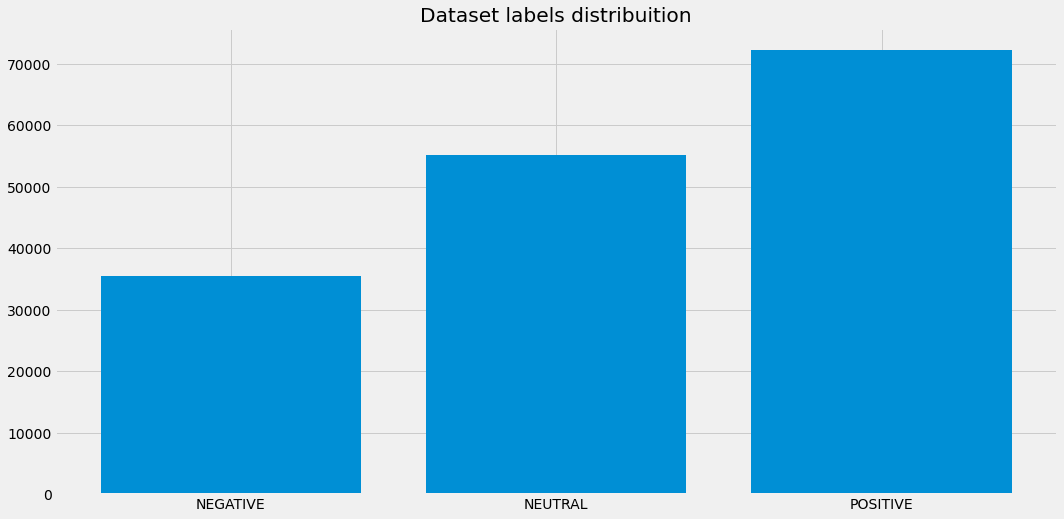

In [15]:
category_cnt = Counter(df.category)

plt.figure(figsize=(16,8))
plt.bar(category_cnt.keys(), category_cnt.values())
plt.title("Dataset labels distribuition")

### **Step - 2.4 :** Text Manipulation and Structurization

In [16]:
# Including Stopwords and exclusing 'not' related stopwords

stop_words = set(stopwords.words("english"))
stop_words.remove('not')
more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
stop_words = stop_words.union(more_stopwords)
                 
stemmer = SnowballStemmer("english")

In [17]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'^[^ ]<.*?>|&([a-z0-9]+|#[0-9]\"\'\“{1,6}|#x[0-9a-f]{1,6});[^A-Za-z0-9]+')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_quotes(text):
    quotes = re.compile(r'[^A-Za-z0-9\s]+')
    return re.sub(quotes, '', text)


# Applying helper functions

df['mod_text'] = df['clean_text'].apply(lambda x: remove_URL(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_emoji(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_html(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_punct(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_quotes(x))
df.head()

,clean_text,category,mod_text
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,NEUTRAL,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...


In [18]:
# Tokenizing the tweet base texts.

df['tokenized'] = df['mod_text'].apply(word_tokenize)

df.head()

,clean_text,category,mod_text,tokenized
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma..."
1,talk all the nonsense and continue all the dra...,NEUTRAL,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,..."
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu..."


In [19]:
# Lower casing clean text.

df['lower'] = df['tokenized'].apply(
    lambda x: [word.lower() for word in x])

df.head()

,clean_text,category,mod_text,tokenized,lower
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma..."
1,talk all the nonsense and continue all the dra...,NEUTRAL,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,...","[talk, all, the, nonsense, and, continue, all,..."
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu..."


In [20]:
# Removing stopwords.

df['stopwords_removed'] = df['lower'].apply(
    lambda x: [word for word in x if word not in stop_words])

df.head()

,clean_text,category,mod_text,tokenized,lower,stopwords_removed
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,NEUTRAL,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,...","[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today..."


In [21]:
# Applying part of speech tags.

df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)

df.head()

,clean_text,category,mod_text,tokenized,lower,stopwords_removed,pos_tags
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...","[(modi, NNS), (promised, VBD), (minimum, JJ), ..."
1,talk all the nonsense and continue all the dra...,NEUTRAL,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,...","[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi]","[(talk, NN), (nonsense, NN), (continue, VBP), ..."
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...","[(say, VB), (vote, NN), (modi, FW), (welcome, ..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...","[(asking, VBG), (supporters, NNS), (prefix, VB..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...","[(answer, NN), (among, IN), (powerful, JJ), (w..."


In [22]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


df['wordnet_pos'] = df['pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

df.head()

,clean_text,category,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...","[(modi, NNS), (promised, VBD), (minimum, JJ), ...","[(modi, n), (promised, v), (minimum, a), (gove..."
1,talk all the nonsense and continue all the dra...,NEUTRAL,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,...","[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi]","[(talk, NN), (nonsense, NN), (continue, VBP), ...","[(talk, n), (nonsense, n), (continue, v), (dra..."
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...","[(say, VB), (vote, NN), (modi, FW), (welcome, ...","[(say, v), (vote, n), (modi, n), (welcome, a),..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...","[(asking, VBG), (supporters, NNS), (prefix, VB...","[(asking, v), (supporters, n), (prefix, v), (c..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...","[(answer, NN), (among, IN), (powerful, JJ), (w...","[(answer, n), (among, n), (powerful, a), (worl..."


In [23]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

df['lemmatized'] = df['wordnet_pos'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

df['lemmatized'] = df['lemmatized'].apply(
    lambda x: [word for word in x if word not in stop_words])

df['lemma_str'] = [' '.join(map(str, l)) for l in df['lemmatized']]

df.head()

,clean_text,category,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...","[(modi, NNS), (promised, VBD), (minimum, JJ), ...","[(modi, n), (promised, v), (minimum, a), (gove...","[modi, promise, minimum, government, maximum, ...",modi promise minimum government maximum govern...
1,talk all the nonsense and continue all the dra...,NEUTRAL,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,...","[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi]","[(talk, NN), (nonsense, NN), (continue, VBP), ...","[(talk, n), (nonsense, n), (continue, v), (dra...","[talk, nonsense, continue, drama, vote, modi]",talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...","[(say, VB), (vote, NN), (modi, FW), (welcome, ...","[(say, v), (vote, n), (modi, n), (welcome, a),...","[say, vote, modi, welcome, bjp, tell, rahul, m...",say vote modi welcome bjp tell rahul main camp...
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...","[(asking, VBG), (supporters, NNS), (prefix, VB...","[(asking, v), (supporters, n), (prefix, v), (c...","[ask, supporter, prefix, chowkidar, name, modi...",ask supporter prefix chowkidar name modi great...
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...","[(answer, NN), (among, IN), (powerful, JJ), (w...","[(answer, n), (among, n), (powerful, a), (worl...","[answer, among, powerful, world, leader, today...",answer among powerful world leader today trump...


In [24]:
print("Total Rows =", len(df.clean_text))

Total Rows = 162969


In [25]:
df.head()

,clean_text,category,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...","[(modi, NNS), (promised, VBD), (minimum, JJ), ...","[(modi, n), (promised, v), (minimum, a), (gove...","[modi, promise, minimum, government, maximum, ...",modi promise minimum government maximum govern...
1,talk all the nonsense and continue all the dra...,NEUTRAL,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,...","[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi]","[(talk, NN), (nonsense, NN), (continue, VBP), ...","[(talk, n), (nonsense, n), (continue, v), (dra...","[talk, nonsense, continue, drama, vote, modi]",talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...","[(say, VB), (vote, NN), (modi, FW), (welcome, ...","[(say, v), (vote, n), (modi, n), (welcome, a),...","[say, vote, modi, welcome, bjp, tell, rahul, m...",say vote modi welcome bjp tell rahul main camp...
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...","[(asking, VBG), (supporters, NNS), (prefix, VB...","[(asking, v), (supporters, n), (prefix, v), (c...","[ask, supporter, prefix, chowkidar, name, modi...",ask supporter prefix chowkidar name modi great...
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...","[(answer, NN), (among, IN), (powerful, JJ), (w...","[(answer, n), (among, n), (powerful, a), (worl...","[answer, among, powerful, world, leader, today...",answer among powerful world leader today trump...


In [26]:
df_mod = df[["lemma_str", "category"]]
df_mod.head()

,lemma_str,category
0,modi promise minimum government maximum govern...,NEGATIVE
1,talk nonsense continue drama vote modi,NEUTRAL
2,say vote modi welcome bjp tell rahul main camp...,POSITIVE
3,ask supporter prefix chowkidar name modi great...,POSITIVE
4,answer among powerful world leader today trump...,POSITIVE


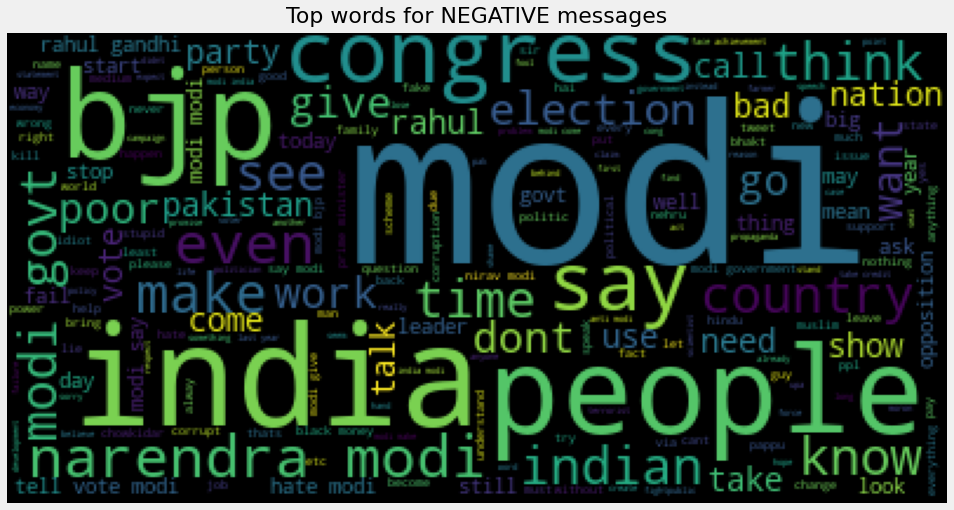

In [27]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wc = WordCloud(
    background_color='black', 
    max_words=200
#     mask=twitter_mask,
)
wc.generate(' '.join(text for text in df.loc[df['category'] == 'NEGATIVE', 'lemma_str']))
plt.figure(figsize=(15,10))
plt.title('Top words for NEGATIVE messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()




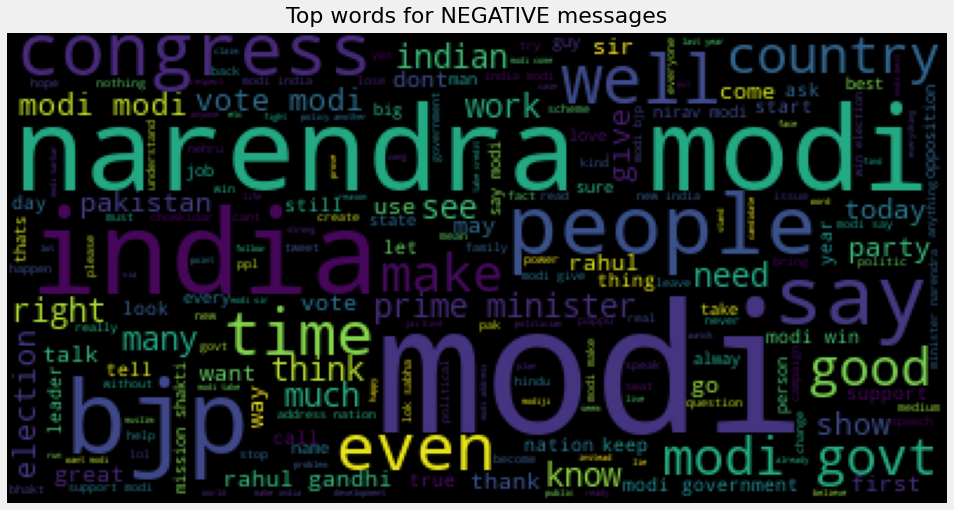

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wc = WordCloud(
    background_color='black', 
    max_words=200
#     mask=twitter_mask,
)
wc.generate(' '.join(text for text in df.loc[df['category'] == 'POSITIVE', 'lemma_str']))
plt.figure(figsize=(15,10))
plt.title('Top words for NEGATIVE messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

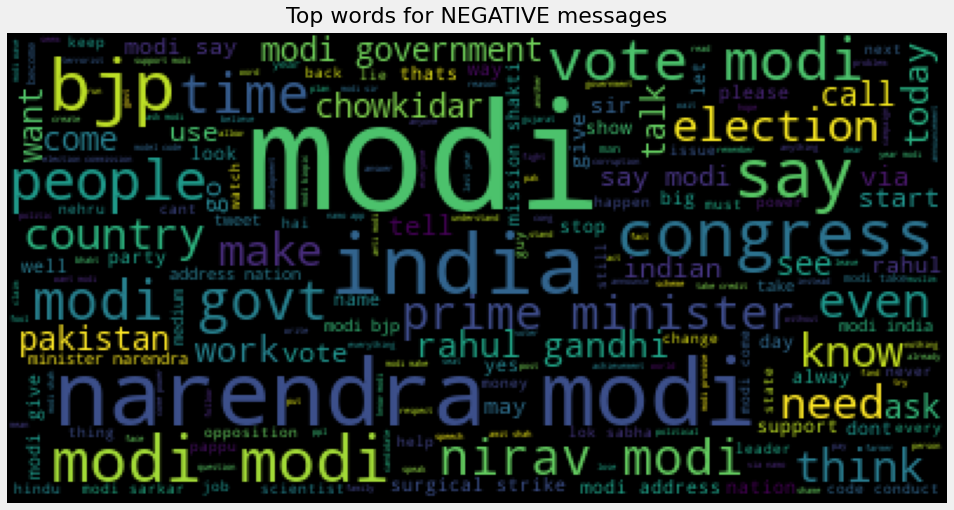

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wc = WordCloud(
    background_color='black', 
    max_words=200
#     mask=twitter_mask,
)
wc.generate(' '.join(text for text in df.loc[df['category'] == 'NEUTRAL', 'lemma_str']))
plt.figure(figsize=(15,10))
plt.title('Top words for NEGATIVE messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

### **Step - 2.4 :** Train-Test Split

In [22]:
df_train, df_test = train_test_split(df_mod, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 130375
TEST size: 32594


## **Step - 3 :** *Word Cloud Analysis*

In [23]:
def plot_wordcloud(text, mask, title, title_size, figure_size=(24.0,16.0), image_color=False):
    """ A function for creating wordcloud images """
    words = text
    allwords = []
    for wordlist in words:
        allwords += wordlist
    mostcommon = FreqDist(allwords).most_common(140)
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stop_words,
                    max_words = 140,
                    max_font_size = 120, 
                    random_state = 42,
                    mask = mask,
    ).generate(str(mostcommon))        
    
    ########
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    

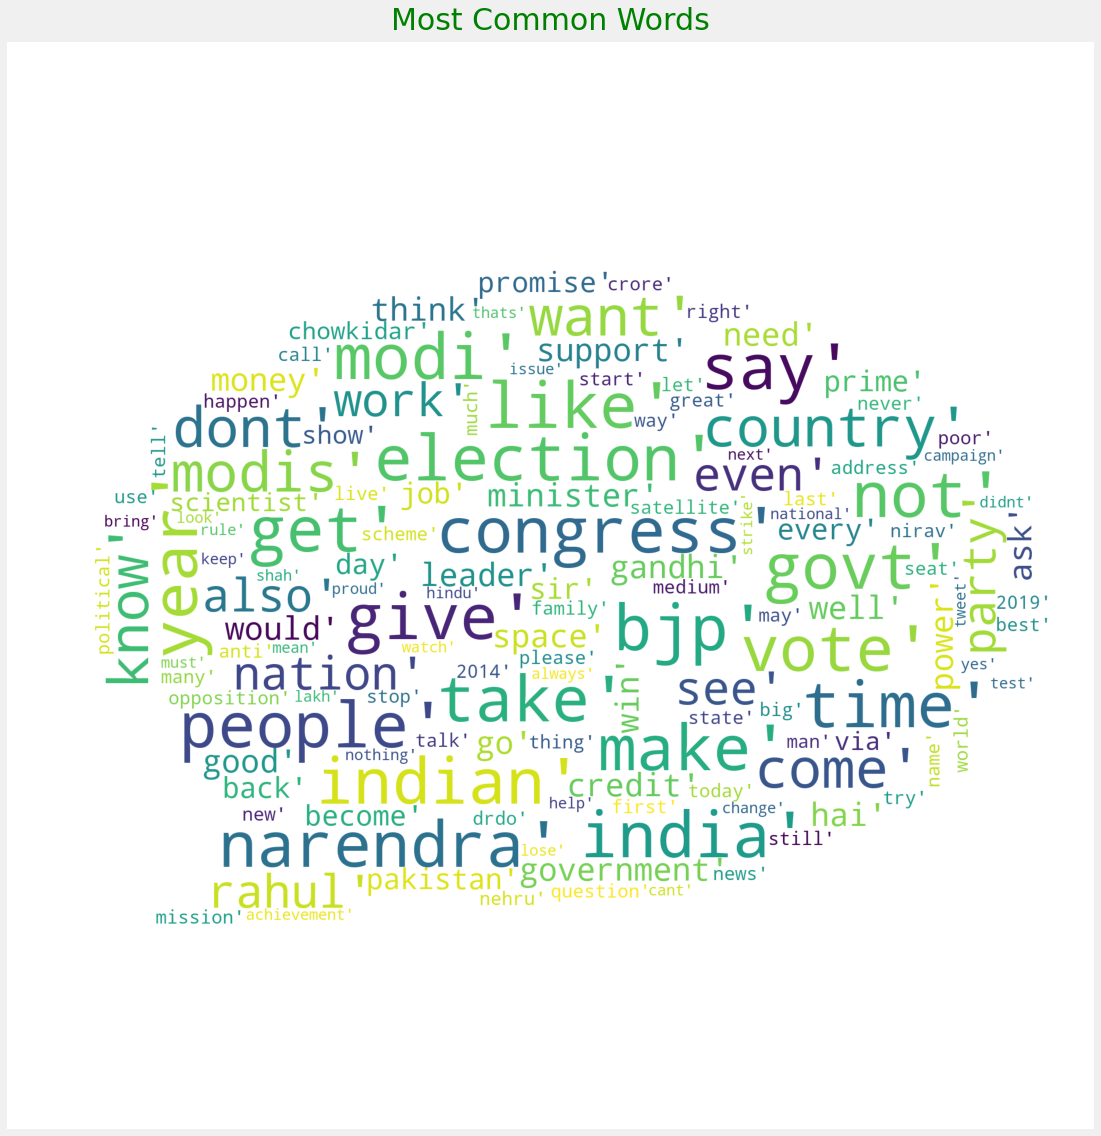

In [26]:
comments_mask = np.array(Image.open('comment.png'))
plot_wordcloud(df['lemmatized'], comments_mask,
               'Most Common Words',
               title_size=30)

## **Step - 4 :** *Word2Vec Analysis*

### **Step - 4.1 :** Corpus Creation

In [27]:
%%time
documents = [text.split() for text in df_train.lemma_str] 

Wall time: 215 ms


### **Step - 4.2 :** Word2Vec Model Creation

In [28]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

2023-01-08 12:21:49,931 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=300, alpha=0.025>', 'datetime': '2023-01-08T12:21:49.931464', 'gensim': '4.3.0', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}


### **Step - 4.3 :** Vocab Creation

In [29]:
w2v_model.build_vocab(documents)

2023-01-08 12:21:53,982 : INFO : collecting all words and their counts
2023-01-08 12:21:53,983 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-01-08 12:21:54,022 : INFO : PROGRESS: at sentence #10000, processed 142968 words, keeping 17488 word types
2023-01-08 12:21:54,056 : INFO : PROGRESS: at sentence #20000, processed 287236 words, keeping 26766 word types
2023-01-08 12:21:54,090 : INFO : PROGRESS: at sentence #30000, processed 429249 words, keeping 34087 word types
2023-01-08 12:21:54,119 : INFO : PROGRESS: at sentence #40000, processed 573534 words, keeping 40685 word types
2023-01-08 12:21:54,148 : INFO : PROGRESS: at sentence #50000, processed 719402 words, keeping 46998 word types
2023-01-08 12:21:54,182 : INFO : PROGRESS: at sentence #60000, processed 862572 words, keeping 52630 word types
2023-01-08 12:21:54,211 : INFO : PROGRESS: at sentence #70000, processed 1007047 words, keeping 57961 word types
2023-01-08 12:21:54,243 : INFO : PROGRESS: at

In [30]:
words = w2v_model.wv.key_to_index.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)


Vocab size 9957


### **Step - 4.4 :** Training Word2Vec Model

In [31]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2023-01-08 12:22:04,413 : INFO : Word2Vec lifecycle event {'msg': 'training model with 8 workers on 9957 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7 shrink_windows=True', 'datetime': '2023-01-08T12:22:04.413514', 'gensim': '4.3.0', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'train'}
2023-01-08 12:22:05,438 : INFO : EPOCH 0 - PROGRESS: at 99.48% examples, 1518765 words/s, in_qsize 1, out_qsize 1
2023-01-08 12:22:05,439 : INFO : EPOCH 0: training on 1875113 raw words (1534060 effective words) took 1.0s, 1525406 effective words/s
2023-01-08 12:22:06,456 : INFO : EPOCH 1 - PROGRESS: at 88.40% examples, 1352290 words/s, in_qsize 14, out_qsize 1
2023-01-08 12:22:06,562 : INFO : EPOCH 1: training on 1875113 raw words (1533592 effective words) took 1.1s, 1382660 effective words/s
2023-01-08 12:22:07,581 : INFO : EPOCH 2 - PROGRESS: at 94.83% examples, 1449110 words/s, in_qsi

Wall time: 41 s


(49096088, 60003616)

### **Step - 4.5 :** Word2Vec Model Testing

In [32]:
w2v_model.wv.most_similar("bjp")

[('party', 0.5190358757972717),
 ('trs', 0.4357033371925354),
 ('ncp', 0.4287416338920593),
 ('cadre', 0.4283500015735626),
 ('congress', 0.42183971405029297),
 ('dmk', 0.4166688621044159),
 ('jds', 0.4063745439052582),
 ('rjd', 0.3990045487880707),
 ('karnataka', 0.39737167954444885),
 ('ally', 0.3830075263977051)]

## **Step - 5 :** *Sentiment Analysis using Deep-Learning Model*

**Deep learning** can be considered as a subset of machine learning. It is a field that is based on learning and improving on its own by examining computer algorithms. While machine learning uses simpler concepts, deep learning works with artificial neural networks, which are designed to imitate how humans think and learn. Until recently, neural networks were limited by computing power and thus were limited in complexity. However, advancements in Big Data analytics have permitted larger, sophisticated neural networks, allowing computers to observe, learn, and react to complex situations faster than humans. Deep learning has aided image classification, language translation, speech recognition. It can be used to solve any pattern recognition problem and without human intervention.


![](https://www.mdpi.com/electronics/electronics-09-00483/article_deploy/html/images/electronics-09-00483-g001.png)

**Long short-term memory (LSTM)** is an artificial recurrent neural network architecture used in the field of deep learning.
Unlike standard feedforward neural networks, LSTM has feedback connections.
It never keeps the entire data like standard recurrent neural network, lstm keeps short-term memory of data.

![](https://miro.medium.com/max/489/1*27JmK8VBdphpSCWNb4MhNA.png)

### **Step - 5.1 :** Token and Vocab Creation

In [33]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.lemma_str)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 86085
Wall time: 2.24 s


In [34]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.lemma_str), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.lemma_str), maxlen=SEQUENCE_LENGTH)

Wall time: 3.31 s


### **Step - 5.2 :** Label Encoding

In [36]:
labels = df_train.category.unique().tolist()

labels

['POSITIVE', 'NEUTRAL', 'NEGATIVE']

In [37]:
encoder = LabelEncoder()
encoder.fit(df_train.category.tolist())

y_train = encoder.transform(df_train.category.tolist())
y_test = encoder.transform(df_test.category.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (130375, 1)
y_test (32594, 1)


In [38]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (130375, 300)
y_train (130375, 1)

x_test (32594, 300)
y_test (32594, 1)


In [39]:
y_train[:10]

array([[2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0]])

### **Step - 5.3 :** Embedding Layer Creation

In [40]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(86085, 300)


In [41]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

### **Step - 5.4 :** Model Creation - LSTM

In [42]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          25825500  
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 25,986,001
Trainable params: 160,501
Non-trainable params: 25,825,500
_________________________________________________________________


### **Step - 5.5 :** Compiling Model

In [43]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

### **Step - 5.6 :** Callback Creation

In [44]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

### **Step - 5.7 :** Model Training 

In [ ]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
115/115 [==============================] - ETA: 0s - loss: -3.5504 - accuracy: 0.3365 WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2023-01-08 13:24:10,788 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


115/115 [==============================] - 3589s 31s/step - loss: -3.5504 - accuracy: 0.3365 - val_loss: -5.8080 - val_accuracy: 0.3405 - lr: 0.0010
Epoch 2/8
115/115 [==============================] - ETA: 0s - loss: -7.0649 - accuracy: 0.3384  WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2023-01-08 15:39:48,282 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


115/115 [==============================] - 8138s 71s/step - loss: -7.0649 - accuracy: 0.3384 - val_loss: -8.7025 - val_accuracy: 0.3405 - lr: 0.0010
Epoch 3/8
115/115 [==============================] - ETA: 0s - loss: -9.8264 - accuracy: 0.3384 WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2023-01-08 17:03:17,054 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


115/115 [==============================] - 5009s 44s/step - loss: -9.8264 - accuracy: 0.3384 - val_loss: -11.4865 - val_accuracy: 0.3405 - lr: 0.0010
Epoch 4/8
115/115 [==============================] - ETA: 0s - loss: -12.5382 - accuracy: 0.3384  WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2023-01-08 19:06:21,733 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


115/115 [==============================] - 7385s 64s/step - loss: -12.5382 - accuracy: 0.3384 - val_loss: -14.2673 - val_accuracy: 0.3405 - lr: 0.0010
Epoch 5/8
115/115 [==============================] - ETA: 0s - loss: -15.2418 - accuracy: 0.3384 WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2023-01-08 20:38:54,316 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


115/115 [==============================] - 5553s 48s/step - loss: -15.2418 - accuracy: 0.3384 - val_loss: -17.0415 - val_accuracy: 0.3405 - lr: 0.0010
Epoch 6/8
115/115 [==============================] - ETA: 0s - loss: -17.9821 - accuracy: 0.3384 WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2023-01-08 22:03:24,932 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


115/115 [==============================] - 5071s 44s/step - loss: -17.9821 - accuracy: 0.3384 - val_loss: -19.9425 - val_accuracy: 0.3405 - lr: 0.0010
Epoch 7/8
115/115 [==============================] - ETA: 0s - loss: -20.8784 - accuracy: 0.3384 WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


2023-01-08 23:30:03,329 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


115/115 [==============================] - 5198s 45s/step - loss: -20.8784 - accuracy: 0.3384 - val_loss: -23.1684 - val_accuracy: 0.3405 - lr: 0.0010
Epoch 8/8
 66/115 [================>.............] - ETA: 41:52 - loss: -23.7790 - accuracy: 0.3390

### **Step - 5.8 :** Model Evaluation 

In [46]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

22/22 [==============================] - 46s 2s/step - loss: 0.3565 - accuracy: 0.8500

ACCURACY: 0.8500370979309082
LOSS: 0.3564917743206024
CPU times: user 2min 12s, sys: 13.1 s, total: 2min 25s
Wall time: 46.3 s


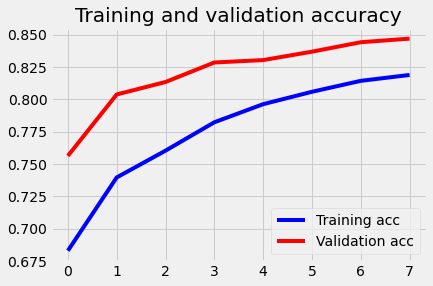

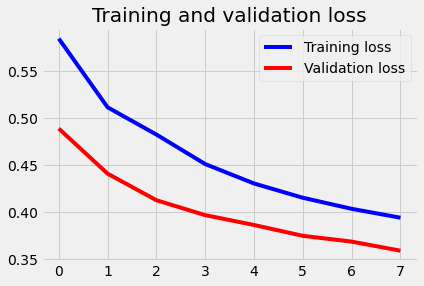

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

### **Step - 5.9 :** Prediction using Model 

In [48]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL ### Whatever not coming in negative and positive sentiments has been considered as neutral
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [49]:
def predict(clean_text, include_neutral=True):
    start_at = time.time()
    # Tokenize clean_text
    x_test = pad_sequences(tokenizer.texts_to_sequences([clean_text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [50]:
predict("I love the music")

{'label': 'POSITIVE',
 'score': 0.9900519847869873,
 'elapsed_time': 0.5215010643005371}

In [51]:
predict("I have nothing to lose")

{'label': 'NEUTRAL',
 'score': 0.5107656121253967,
 'elapsed_time': 0.2791745662689209}

In [52]:
predict("Experience has been bad")

{'label': 'NEGATIVE',
 'score': 0.0340648889541626,
 'elapsed_time': 0.27196311950683594}

### **Step - 5.10 :** Creating Confusion Matrix 

In [53]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.category)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

3/3 [==============================] - 34s 10s/step
CPU times: user 1min 46s, sys: 10.5 s, total: 1min 57s
Wall time: 34.3 s


In [54]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

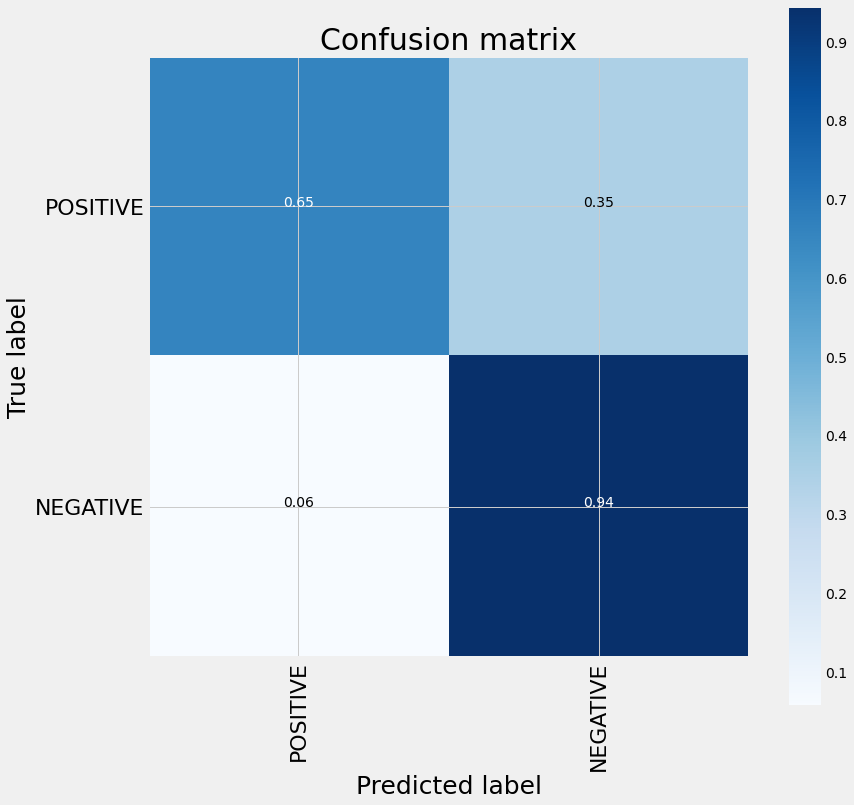

CPU times: user 336 ms, sys: 236 ms, total: 572 ms
Wall time: 337 ms


In [55]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.category.unique(), title="Confusion matrix")
plt.show()

### **Step - 5.11 :** Classification Report 

In [56]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    NEGATIVE       0.85      0.65      0.74      7026
    POSITIVE       0.85      0.94      0.89     14526

    accuracy                           0.85     21552
   macro avg       0.85      0.80      0.82     21552
weighted avg       0.85      0.85      0.84     21552



### **Step - 5.12 :** Accuracy Score 

In [57]:
accuracy_score(y_test_1d, y_pred_1d)

0.85003711952487

### **Step - 5.13 :** Saving Model for future use 

In [58]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)